In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Machine learning packages
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV,LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
df = pd.read_csv('pcb_dataset_final.tsv',sep='\t')

In [7]:
df.head()

,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,...,time_since_last_click,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,0,20073966,22589171,0,-1,-1,0,0,-1,-1,...,-1,5824233,9312274,3490278,29196072,11409686,1973606,25162884,29196072,29196072
1,2,24607497,884761,0,-1,-1,0,0,-1,-1,...,423858,30763035,9312274,14584482,29196072,11409686,1973606,22644417,9312274,21091111
2,2,28474333,18975823,0,-1,-1,0,0,-1,-1,...,8879,138937,9312274,10769841,29196072,5824237,138937,1795451,29196072,15351056
3,3,7306395,29427842,1,1449193,3063962,0,1,0,7,...,-1,28928366,26597095,12435261,23549932,5824237,1973606,9180723,29841067,29196072
4,3,25357769,13365547,0,-1,-1,0,0,-1,-1,...,-1,138937,26597094,31616034,29196072,11409684,26597096,4480345,29196072,29196072


In [38]:
df[df['conversion'] == 1].head(20)

,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,...,time_since_last_click,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
3,3,7306395,29427842,1,1449193,3063962,0,1,0,7,...,-1,28928366,26597095,12435261,23549932,5824237,1973606,9180723,29841067,29196072
11,9,22258697,2869134,1,41,16096895,1,1,0,1,...,1659878,25259032,9312274,10664917,29196072,11409685,29196072,1001856,29196072,18291877
25,17,15394453,9100693,1,154,24795488,1,1,0,1,...,583864,25259032,5824236,4223617,23549932,26611395,1973606,11974250,29196072,8661623
44,25,6013772,15184511,1,138469,15587012,0,1,1,6,...,536,25259032,28928366,10089519,15743247,5824235,32440044,32081193,29196072,6083952
52,30,9451380,17321082,1,355909,4136014,0,1,1,3,...,363648,28928366,5824237,13175372,29196072,5824237,30763035,7230114,29196072,21091111
90,47,21594641,14121532,1,1558,16227998,1,1,0,1,...,-1,30763035,7477605,5571462,29196072,11409686,1973606,8243524,14911188,29196072
109,55,25876794,31736975,1,381646,19170062,0,1,0,1,...,-1,28928366,9312274,27674176,29196072,26611393,1973606,9312274,3225256,29196072
148,83,4044112,28091103,1,1652,426663,1,1,0,1,...,-1,138937,9312274,32356880,29196072,5824241,28928366,24969626,29196072,29196072
166,93,2380977,32368244,1,1471679,28647208,0,1,5,8,...,145936,25259032,7477605,8516481,29196072,11409684,30763035,30328882,29196072,29520626
180,101,3208958,28739284,1,2469937,20579181,0,1,0,2,...,1304327,30763035,9312274,31310250,29196072,32440044,5824239,15154549,29196072,18291877


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468027 entries, 0 to 16468026
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   timestamp              int64  
 1   uid                    int64  
 2   campaign               int64  
 3   conversion             int64  
 4   conversion_timestamp   int64  
 5   conversion_id          int64  
 6   attribution            int64  
 7   click                  int64  
 8   click_pos              int64  
 9   click_nb               int64  
 10  cost                   float64
 11  cpo                    float64
 12  time_since_last_click  int64  
 13  cat1                   int64  
 14  cat2                   int64  
 15  cat3                   int64  
 16  cat4                   int64  
 17  cat5                   int64  
 18  cat6                   int64  
 19  cat7                   int64  
 20  cat8                   int64  
 21  cat9                   int64  
dtypes: float64(2), i

In [9]:
df.shape

(16468027, 22)

In [11]:
df.isnull().sum()

timestamp                0
uid                      0
campaign                 0
conversion               0
conversion_timestamp     0
conversion_id            0
attribution              0
click                    0
click_pos                0
click_nb                 0
cost                     0
cpo                      0
time_since_last_click    0
cat1                     0
cat2                     0
cat3                     0
cat4                     0
cat5                     0
cat6                     0
cat7                     0
cat8                     0
cat9                     0
dtype: int64

### Performing EDA

In [9]:
# keeping on the required columns for analysis
# dropping Id and Time
df_eda = df.drop(columns=['campaign','conversion_id','conversion_timestamp','timestamp','time_since_last_click'])

In [16]:
df_eda['conversion'].value_counts()

conversion
0    15661831
1      806196
Name: count, dtype: int64

In [18]:
df_eda.shape

(16468027, 17)

### Converting variables from int to bool/categorical as applicable

In [11]:
df_eda['conversion'] = df_eda['conversion'].astype('bool')
df_eda['attribution'] = df_eda['attribution'].astype('bool')
df_eda['click'] = df_eda['click'].astype('bool')
df_eda['cat1'] = df_eda['cat1'].astype(str)
df_eda['cat2'] = df_eda['cat2'].astype(str)
df_eda['cat3'] = df_eda['cat3'].astype(str)
df_eda['cat4'] = df_eda['cat4'].astype(str)
df_eda['cat5'] = df_eda['cat5'].astype(str)
df_eda['cat6'] = df_eda['cat6'].astype(str)
df_eda['cat7'] = df_eda['cat7'].astype(str)
df_eda['cat8'] = df_eda['cat8'].astype(str)
df_eda['cat9'] = df_eda['cat9'].astype(str)

In [24]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468027 entries, 0 to 16468026
Data columns (total 17 columns):
 #   Column       Dtype  
---  ------       -----  
 0   uid          int64  
 1   conversion   bool   
 2   attribution  bool   
 3   click        bool   
 4   click_pos    int64  
 5   click_nb     int64  
 6   cost         float64
 7   cpo          float64
 8   cat1         object 
 9   cat2         object 
 10  cat3         object 
 11  cat4         object 
 12  cat5         object 
 13  cat6         object 
 14  cat7         object 
 15  cat8         object 
 16  cat9         object 
dtypes: bool(3), float64(2), int64(3), object(9)
memory usage: 1.8+ GB


### Basic summary statistics (or) Univariate analysis

In [29]:
# summary of review scores
df_eda[['click_nb','cost','cpo','click_pos']].describe().T

,count,mean,std,min,25%,50%,75%,max
click_nb,16468027.0,-0.662602,2.696254,-1.00000,-1.000000,-1.000000,-1.000000,174.000000
cost,16468027.0,0.000293,0.000869,0.00001,0.000022,0.000076,0.000235,0.058345
cpo,16468027.0,0.196429,0.118638,0.00400,0.106539,0.191904,0.273251,1.016311
click_pos,16468027.0,-0.831266,1.532221,-1.00000,-1.000000,-1.000000,-1.000000,173.000000


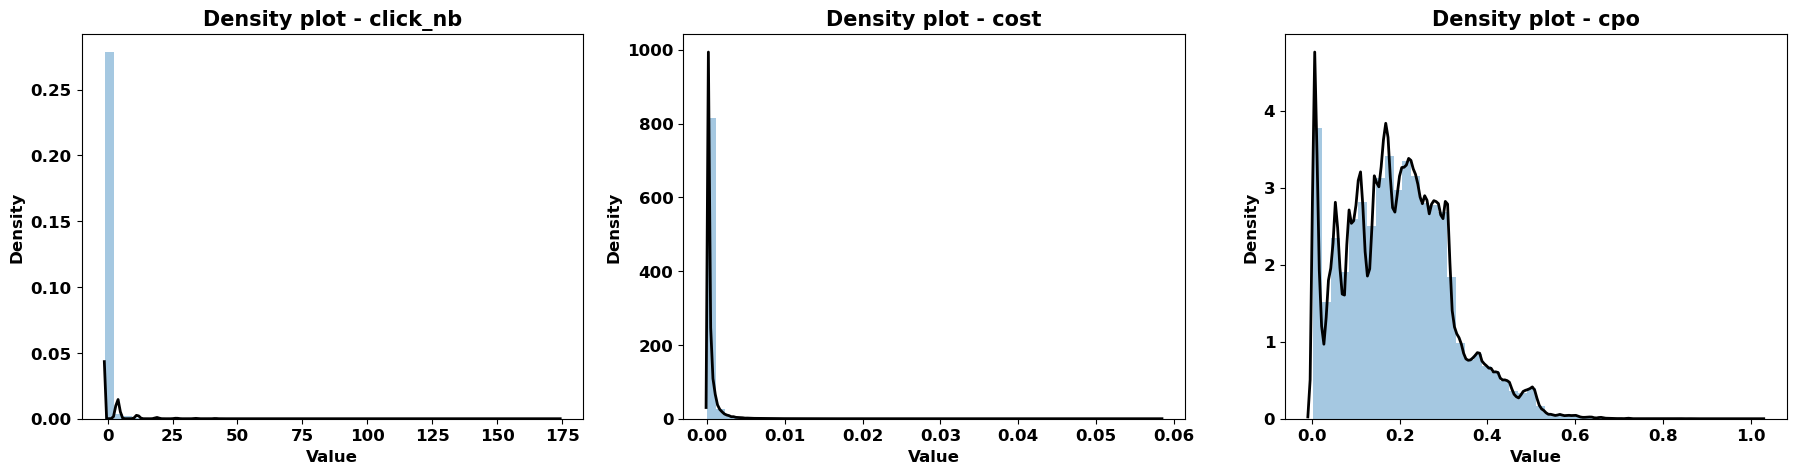

In [31]:
# plotting the values
plt.subplots(1,3, figsize=(22,5))


plt.subplot(1,3,1)
sns.distplot(df_eda['click_nb'], kde_kws={"color": "k", "lw": 2, "label": "KDE"})
plt.xticks(fontsize=12, fontweight='bold')
plt.xlabel("Value", fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.ylabel("Density", fontsize=12, fontweight='bold')
plt.title("Density plot - click_nb", fontsize=15, fontweight='bold')

plt.subplot(1,3,2)
sns.distplot(df_eda['cost'], kde_kws={"color": "k", "lw": 2, "label": "KDE"})
plt.xticks(fontsize=12, fontweight='bold')
plt.xlabel("Value", fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.ylabel("Density", fontsize=12, fontweight='bold')
plt.title("Density plot - cost", fontsize=15, fontweight='bold')

plt.subplot(1,3,3)
sns.distplot(df_eda['cpo'], kde_kws={"color": "k", "lw": 2, "label": "KDE"})
plt.xticks(fontsize=12, fontweight='bold')
plt.xlabel("Value", fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.ylabel("Density", fontsize=12, fontweight='bold')
plt.title("Density plot - cpo", fontsize=15, fontweight='bold')

plt.show()

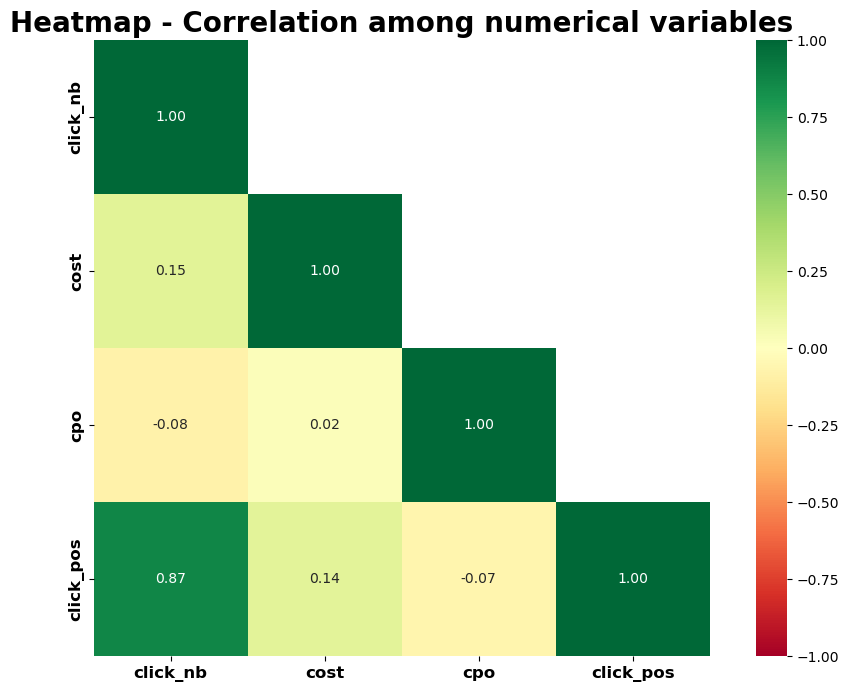

In [33]:
# correlation plot of numerical values
plt.figure(figsize=(12,8))
corr_var = df_eda[['click_nb','cost','cpo','click_pos']].corr()
sns.heatmap(corr_var, annot=True, square=True, fmt='.2f', cmap='RdYlGn', vmin=-1, mask=np.triu(corr_var, 1))
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title("Heatmap - Correlation among numerical variables", fontsize=20, fontweight='bold')
plt.show()

### Segregating categorical columns

In [13]:
catcolumns =['click_pos','attribution','conversion','click','cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9']
df_numerical = df_eda.loc[:, ~df_eda.columns.isin(catcolumns)]
df_categorical = df_eda[catcolumns]

In [192]:
df_numerical.head()

,uid,click_nb,cost,cpo
0,20073966,-1,0.000010,0.390794
1,24607497,-1,0.000010,0.059600
2,28474333,-1,0.000183,0.149706
3,7306395,7,0.000094,0.154785
4,25357769,-1,0.000032,0.037583


In [15]:
df_categorical.head()

,click_pos,attribution,conversion,click,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,-1,False,False,False,5824233,9312274,3490278,29196072,11409686,1973606,25162884,29196072,29196072
1,-1,False,False,False,30763035,9312274,14584482,29196072,11409686,1973606,22644417,9312274,21091111
2,-1,False,False,False,138937,9312274,10769841,29196072,5824237,138937,1795451,29196072,15351056
3,0,False,True,True,28928366,26597095,12435261,23549932,5824237,1973606,9180723,29841067,29196072
4,-1,False,False,False,138937,26597094,31616034,29196072,11409684,26597096,4480345,29196072,29196072


### Transforming attribution, conversion, click into 0/1

In [17]:
df_categorical["attribution"] = df_categorical["attribution"].astype(int)
df_categorical["conversion"] = df_categorical["conversion"].astype(int)
df_categorical["click"] = df_categorical["click"].astype(int)

In [19]:
df_2=df_categorical['cat1'].value_counts().to_frame().reset_index()
df_categorical = pd.merge(df_categorical, df_2, how='left', left_on='cat1', right_on='cat1')
df_categorical.loc[(df_categorical['count']>=0) & (df_categorical['count']<=99), 'cat1_num'] = 1
df_categorical.loc[(df_categorical['count']>=100) & (df_categorical['count']<=999), 'cat1_num'] = 2
df_categorical.loc[(df_categorical['count']>=1000) & (df_categorical['count']<=9999), 'cat1_num'] = 3
df_categorical.loc[(df_categorical['count']>=10000) & (df_categorical['count']<=99999), 'cat1_num'] = 4
df_categorical.loc[(df_categorical['count']>=100000), 'cat1_num'] = 5
df_categorical.drop(['count','cat1'],axis=1, inplace=True)

In [21]:
df_2=df_categorical['cat2'].value_counts().to_frame().reset_index()
df_categorical = pd.merge(df_categorical, df_2, how='left', left_on='cat2', right_on='cat2')
df_categorical.loc[(df_categorical['count']>=0) & (df_categorical['count']<=99), 'cat2_num'] = 1
df_categorical.loc[(df_categorical['count']>=100) & (df_categorical['count']<=999), 'cat2_num'] = 2
df_categorical.loc[(df_categorical['count']>=1000) & (df_categorical['count']<=9999), 'cat2_num'] = 3
df_categorical.loc[(df_categorical['count']>=10000) & (df_categorical['count']<=99999), 'cat2_num'] = 4
df_categorical.loc[(df_categorical['count']>=100000), 'cat2_num'] = 5
df_categorical.drop(['count','cat2'],axis=1, inplace=True)

In [23]:
df_2=df_categorical['cat3'].value_counts().to_frame().reset_index()
df_categorical = pd.merge(df_categorical, df_2, how='left', left_on='cat3', right_on='cat3')
df_categorical.loc[(df_categorical['count']>=0) & (df_categorical['count']<=99), 'cat3_num'] = 1
df_categorical.loc[(df_categorical['count']>=100) & (df_categorical['count']<=999), 'cat3_num'] = 2
df_categorical.loc[(df_categorical['count']>=1000) & (df_categorical['count']<=9999), 'cat3_num'] = 3
df_categorical.loc[(df_categorical['count']>=10000) & (df_categorical['count']<=99999), 'cat3_num'] = 4
df_categorical.loc[(df_categorical['count']>=100000), 'cat3_num'] = 5
df_categorical.drop(['count','cat3'],axis=1, inplace=True)

In [25]:
df_2=df_categorical['cat4'].value_counts().to_frame().reset_index()
df_categorical = pd.merge(df_categorical, df_2, how='left', left_on='cat4', right_on='cat4')
df_categorical.loc[(df_categorical['count']>=0) & (df_categorical['count']<=99), 'cat4_num'] = 1
df_categorical.loc[(df_categorical['count']>=100) & (df_categorical['count']<=999), 'cat4_num'] = 2
df_categorical.loc[(df_categorical['count']>=1000) & (df_categorical['count']<=9999), 'cat4_num'] = 3
df_categorical.loc[(df_categorical['count']>=10000) & (df_categorical['count']<=99999), 'cat4_num'] = 4
df_categorical.loc[(df_categorical['count']>=100000), 'cat4_num'] = 5
df_categorical.drop(['count','cat4'],axis=1, inplace=True)

In [27]:
df_2=df_categorical['cat5'].value_counts().to_frame().reset_index()
df_categorical = pd.merge(df_categorical, df_2, how='left', left_on='cat5', right_on='cat5')
df_categorical.loc[(df_categorical['count']>=0) & (df_categorical['count']<=99), 'cat5_num'] = 1
df_categorical.loc[(df_categorical['count']>=100) & (df_categorical['count']<=999), 'cat5_num'] = 2
df_categorical.loc[(df_categorical['count']>=1000) & (df_categorical['count']<=9999), 'cat5_num'] = 3
df_categorical.loc[(df_categorical['count']>=10000) & (df_categorical['count']<=99999), 'cat5_num'] = 4
df_categorical.loc[(df_categorical['count']>=100000), 'cat5_num'] = 5
df_categorical.drop(['count','cat5'],axis=1, inplace=True)

In [29]:
df_2=df_categorical['cat6'].value_counts().to_frame().reset_index()
df_categorical = pd.merge(df_categorical, df_2, how='left', left_on='cat6', right_on='cat6')
df_categorical.loc[(df_categorical['count']>=0) & (df_categorical['count']<=99), 'cat6_num'] = 1
df_categorical.loc[(df_categorical['count']>=100) & (df_categorical['count']<=999), 'cat6_num'] = 2
df_categorical.loc[(df_categorical['count']>=1000) & (df_categorical['count']<=9999), 'cat6_num'] = 3
df_categorical.loc[(df_categorical['count']>=10000) & (df_categorical['count']<=99999), 'cat6_num'] = 4
df_categorical.loc[(df_categorical['count']>=100000), 'cat6_num'] = 5
df_categorical.drop(['count','cat6'],axis=1, inplace=True)

In [31]:
df_2=df_categorical['cat7'].value_counts().to_frame().reset_index()
df_categorical = pd.merge(df_categorical, df_2, how='left', left_on='cat7', right_on='cat7')
df_categorical.loc[(df_categorical['count']>=0) & (df_categorical['count']<=99), 'cat7_num'] = 1
df_categorical.loc[(df_categorical['count']>=100) & (df_categorical['count']<=999), 'cat7_num'] = 2
df_categorical.loc[(df_categorical['count']>=1000) & (df_categorical['count']<=9999), 'cat7_num'] = 3
df_categorical.loc[(df_categorical['count']>=10000) & (df_categorical['count']<=99999), 'cat7_num'] = 4
df_categorical.loc[(df_categorical['count']>=100000), 'cat7_num'] = 5
df_categorical.drop(['count','cat7'],axis=1, inplace=True)

In [33]:
df_2=df_categorical['cat8'].value_counts().to_frame().reset_index()
df_categorical = pd.merge(df_categorical, df_2, how='left', left_on='cat8', right_on='cat8')
df_categorical.loc[(df_categorical['count']>=0) & (df_categorical['count']<=99), 'cat8_num'] = 1
df_categorical.loc[(df_categorical['count']>=100) & (df_categorical['count']<=999), 'cat8_num'] = 2
df_categorical.loc[(df_categorical['count']>=1000) & (df_categorical['count']<=9999), 'cat8_num'] = 3
df_categorical.loc[(df_categorical['count']>=10000) & (df_categorical['count']<=99999), 'cat8_num'] = 4
df_categorical.loc[(df_categorical['count']>=100000), 'cat8_num'] = 5
df_categorical.drop(['count','cat8'],axis=1, inplace=True)

In [35]:
df_2=df_categorical['cat9'].value_counts().to_frame().reset_index()
df_categorical = pd.merge(df_categorical, df_2, how='left', left_on='cat9', right_on='cat9')
df_categorical.loc[(df_categorical['count']>=0) & (df_categorical['count']<=99), 'cat9_num'] = 1
df_categorical.loc[(df_categorical['count']>=100) & (df_categorical['count']<=999), 'cat9_num'] = 2
df_categorical.loc[(df_categorical['count']>=1000) & (df_categorical['count']<=9999), 'cat9_num'] = 3
df_categorical.loc[(df_categorical['count']>=10000) & (df_categorical['count']<=99999), 'cat9_num'] = 4
df_categorical.loc[(df_categorical['count']>=100000), 'cat9_num'] = 5
df_categorical.drop(['count','cat9'],axis=1, inplace=True)

In [37]:
df_categorical

,click_pos,attribution,conversion,click,cat1_num,cat2_num,cat3_num,cat4_num,cat5_num,cat6_num,cat7_num,cat8_num,cat9_num
0,-1,0,0,0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0
1,-1,0,0,0,5.0,5.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0
2,-1,0,0,0,5.0,5.0,4.0,5.0,5.0,5.0,2.0,5.0,5.0
3,0,0,1,1,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0
4,-1,0,0,0,5.0,4.0,4.0,5.0,5.0,5.0,1.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16468022,-1,0,0,1,5.0,5.0,4.0,5.0,5.0,5.0,2.0,5.0,5.0
16468023,-1,0,0,0,5.0,5.0,4.0,5.0,5.0,5.0,2.0,5.0,5.0
16468024,-1,0,0,0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,5.0
16468025,-1,0,0,1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [106]:
df_categorical

,click_pos,attribution,conversion,click,cat7,cat8,cat9,cat1_num,cat2_num,cat3_num,cat4_num,cat5_num,cat6_num,count_x,cat7_num,count_y,count
0,-1,0,0,0,25162884,29196072,29196072,2.0,7.0,4.0,7.0,5.0,7.0,14690,3.0,14690,14690
1,-1,0,0,0,22644417,9312274,21091111,5.0,7.0,4.0,7.0,5.0,7.0,3098,2.0,3098,3098
2,-1,0,0,0,1795451,29196072,15351056,4.0,7.0,4.0,7.0,6.0,4.0,603,1.0,603,603
3,0,0,1,1,9180723,29841067,29196072,4.0,6.0,4.0,6.0,6.0,7.0,58770,3.0,58770,58770
4,-1,0,0,0,4480345,29196072,29196072,4.0,4.0,4.0,7.0,4.0,4.0,7,1.0,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16468022,-1,0,0,1,18391143,29196072,8661623,5.0,6.0,4.0,7.0,4.0,4.0,123,1.0,123,123
16468023,-1,0,0,0,27259439,29196072,8661620,3.0,7.0,4.0,7.0,6.0,6.0,450,1.0,450,450
16468024,-1,0,0,0,3696777,29196072,21091111,5.0,4.0,4.0,7.0,6.0,6.0,9979,2.0,9979,9979
16468025,-1,0,0,1,5642940,14911188,29196072,3.0,5.0,6.0,7.0,4.0,7.0,154670,4.0,154670,154670


Engineering extra columns
Based on timestamp, created day, hour columns
Created columns 'last_click' and 'first_click' to segregate last click and first click based on attribution
Created a column 'delta' that denotes the time difference between the time of the ad and conversion

In [39]:
df_feature = pd.DataFrame()

In [41]:
df_feature['day'] = (df.timestamp / 86400).astype(int)
df_feature['hour'] = (df.timestamp / 3600).astype(int)
df_feature['last_click'] = df.attribution * (df.click_pos == df.click_nb - 1).astype(int)
df_feature['first_click'] = df.attribution * (df.click_pos == 0).astype(int)
df_feature['delta'] = -1
df_feature.loc[df.conversion == 1, 'delta'] = df['conversion_timestamp'] - df['timestamp']

In [43]:
df_feature

,day,hour,last_click,first_click,delta
0,0,0,0,0,-1
1,0,0,0,0,-1
2,0,0,0,0,-1
3,0,0,0,0,1449190
4,0,0,0,0,-1
...,...,...,...,...,...
16468022,30,741,0,0,-1
16468023,30,741,0,0,-1
16468024,30,741,0,0,-1
16468025,30,741,0,0,-1


### Joined numerical, categorical and extra dataframes into one

In [46]:
df_final = df_numerical.join(df_categorical).join(df_feature)

In [48]:
df_final

,uid,click_nb,cost,cpo,click_pos,attribution,conversion,click,cat1_num,cat2_num,...,cat5_num,cat6_num,cat7_num,cat8_num,cat9_num,day,hour,last_click,first_click,delta
0,20073966,-1,0.000010,0.390794,-1,0,0,0,5.0,5.0,...,5.0,5.0,4.0,5.0,5.0,0,0,0,0,-1
1,24607497,-1,0.000010,0.059600,-1,0,0,0,5.0,5.0,...,5.0,5.0,3.0,5.0,5.0,0,0,0,0,-1
2,28474333,-1,0.000183,0.149706,-1,0,0,0,5.0,5.0,...,5.0,5.0,2.0,5.0,5.0,0,0,0,0,-1
3,7306395,7,0.000094,0.154785,0,0,1,1,5.0,5.0,...,5.0,5.0,4.0,5.0,5.0,0,0,0,0,1449190
4,25357769,-1,0.000032,0.037583,-1,0,0,0,5.0,4.0,...,5.0,5.0,1.0,5.0,5.0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16468022,5767906,-1,0.000024,0.105551,-1,0,0,1,5.0,5.0,...,5.0,5.0,2.0,5.0,5.0,30,741,0,0,-1
16468023,6852682,-1,0.000031,0.152418,-1,0,0,0,5.0,5.0,...,5.0,5.0,2.0,5.0,5.0,30,741,0,0,-1
16468024,16638720,-1,0.000067,0.189066,-1,0,0,0,5.0,4.0,...,5.0,5.0,3.0,5.0,5.0,30,741,0,0,-1
16468025,3032300,-1,0.000050,0.301084,-1,0,0,1,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,30,741,0,0,-1


Inorder to predict the optimal bid price, we need to calculate range of prices where there is more conversion than no conversion. To calculate that, we need the conversions that have max probaility of occurances. That being said, logistic regression not only helps in classification but also can predict the probability of the 1's and 0's occuring. Thus, leveraging the probability offered by logistic regression to calculate the top 10% of rows that have more probability of conversion I'm factoring the data to calulate the optimal price range.

Here we are analyzing with the goal of finding the optimal price range while maximizing the conversions from the ad impressions.

In [51]:
y = df_final['conversion']
X = df_final.drop(['conversion','attribution','uid','delta','last_click'],axis=1)

In [53]:
#Created test/train data split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [55]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear',random_state=42)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [69]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
#print(classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [67]:
y_test.shape

(3293606,)

In [164]:
df_final.corr()['conversion'].sort_values(ascending=False)

conversion     1.000000
attribution    0.732341
delta          0.643205
click_nb       0.551548
last_click     0.508758
first_click    0.508168
click_pos      0.485381
click          0.301750
cost           0.183310
cat8_num       0.004825
day            0.002368
hour           0.002116
uid           -0.000751
cat6_num      -0.013635
cat3_num      -0.013967
cat7_num      -0.020782
cat5_num      -0.030345
cat2_num      -0.051452
cat1_num      -0.075136
cat9_num      -0.114840
cpo           -0.164742
cat4_num      -0.178869
Name: conversion, dtype: float64

In [168]:
# As we can see that there might be some correlated features with the target variable we will drop the features 'last_click', 'delta'.

In [176]:
y.value_counts()

conversion
0    15661831
1      806196
Name: count, dtype: int64

In [184]:
from sklearn.ensemble import RandomForestClassifier

In [186]:
#Initiate the model with default parameters
model = RandomForestClassifier(max_depth=20,random_state=42)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [188]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   3133109
           1       1.00      1.00      1.00    160497

    accuracy                           1.00   3293606
   macro avg       1.00      1.00      1.00   3293606
weighted avg       1.00      1.00      1.00   3293606



### Calculating the probabilty of occurances of conversion to the data

In [72]:
myarray = logreg.predict_proba(X)
df_2 = pd.DataFrame(myarray, columns = ['pred_0','pred_1'])

In [74]:
df_2

,pred_0,pred_1
0,0.999980,0.000020
1,0.999977,0.000023
2,0.999977,0.000023
3,0.000000,1.000000
4,0.999969,0.000031
...,...,...
16468022,0.999873,0.000127
16468023,0.999967,0.000033
16468024,0.999962,0.000038
16468025,0.999902,0.000098


In [76]:
df = df.join(df_2['pred_1'])

### Sorting the data to arrange according to the top conversion probability

In [79]:
df.sort_values(by='pred_1',ascending=False)

,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,...,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,pred_1
4071563,637408,18086909,15746419,1,638504,7262360,1,1,8,9,...,30763035,5642940,16436521,29196072,32440044,1973606,28630417,14911188,32145483,1.000000
12615682,2021110,5867417,25920690,1,3819457,29073777,0,1,0,24,...,25259032,9312274,14369606,6755486,5824236,28928366,28386592,29196072,6083952,1.000000
8164988,1276198,7846885,32368244,1,1326463,22123368,0,1,4,5,...,25259032,7477605,8516481,29196072,11409684,29196072,16407721,29196072,8661623,1.000000
4807642,743672,25602637,30491418,1,2468196,20128523,0,1,2,9,...,25259032,26597095,3564243,29196072,5824237,28928366,18919433,29196072,21091108,1.000000
14568097,2354442,16542952,32452111,1,2882292,3913474,0,1,7,10,...,28928366,9312274,8181301,29196072,5824237,1973606,6288950,32440044,21091111,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186565,40880,4795348,10341182,0,-1,-1,0,0,-1,-1,...,30763035,7477605,28051087,29196072,32440044,1973606,31785010,29196072,6755486,0.000017
701100,121581,3454326,17686799,0,-1,-1,0,0,-1,-1,...,30763035,9068207,20239695,29196072,32440044,29196072,11871047,29196072,6755486,0.000017
1328015,217041,23531974,5061834,0,-1,-1,0,0,-1,-1,...,30763035,32440053,28944164,29196072,26611392,30763035,9312274,29196072,6755486,0.000017
1167831,196111,15221779,5061834,0,-1,-1,0,0,-1,-1,...,1973606,26597096,28944164,29196072,26611392,20754142,5642940,29196072,6755486,0.000017


### Retrieving the top 10% of the rows

In [82]:
df_rank = df.sort_values(by='pred_1',ascending=False).head(int(len(df)/10))

### Calculation of metrics: CPO per customer where there is conversion and no-conversion

In [85]:
df_X = df_rank.groupby(['conversion','uid']).agg({'cpo': ['mean'],'uid':['count']}).reset_index()

In [91]:
df_X.columns

Index(['conversion_', 'uid_', 'cpo_mean', 'uid_count'], dtype='object')

In [89]:
df_X.columns = ['_'.join(col) for col in df_X.columns.values]
print(df_X)

        conversion_      uid_  cpo_mean  uid_count
0                 0        53  0.336002          1
1                 0       271  0.040171          1
2                 0       292  0.491157          5
3                 0       348  0.258445          1
4                 0       435  0.223400          1
...             ...       ...       ...        ...
925022            1  32458202  0.102344          5
925023            1  32458575  0.165650          1
925024            1  32458592  0.149125          2
925025            1  32458740  0.317035          1
925026            1  32458754  0.004000          1

[925027 rows x 4 columns]


### Plotting the CPO vs # of Customer for converted impressions

<Axes: xlabel='cpo_mean', ylabel='uid_count'>

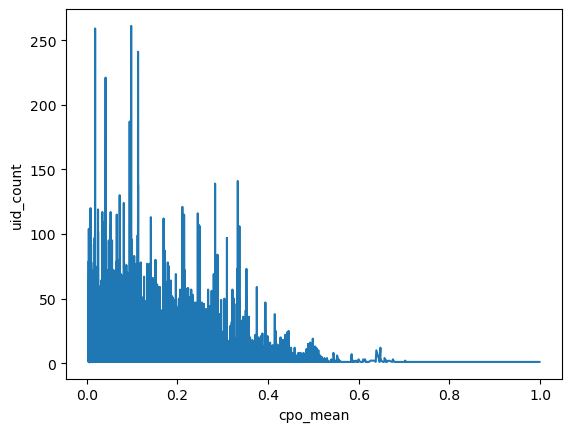

In [94]:
sns.lineplot(x='cpo_mean', y="uid_count",ci=50,
            data=df_X[df_X.conversion_==1])

### Plotting the CPO vs # of Customer for non converted impressions

<Axes: xlabel='cpo_mean', ylabel='uid_count'>

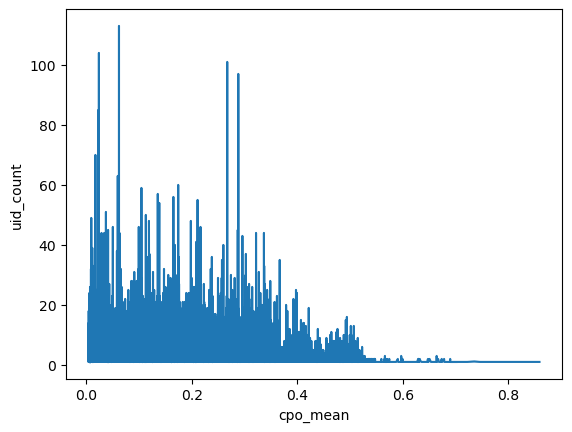

In [98]:
sns.lineplot(x='cpo_mean', y="uid_count",ci=50,
        data=df_X[df_X.conversion_==0])

### Final Takeaways

From both the plots we see that the Conversion plot dominates the non-converted plots when the CPO is in between 0.05 - 0.1 USD per order. At these rates there exists a good probability of conversion that makes this price range as the optimal price range that needs to be targetted to ensure quality conversion of impressions.